### КУРС "Введение в обработку естественного языка"

### ДЗ Урок 2. Создание признакового пространства

Продолжим обработку данных с Твиттера. 

Тема «Создание признакового пространства»

Продолжим обработку данных с Твиттера. 

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
 -	Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
 -	Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
 -	Исключим стоп-слова с помощью stop_words='english'. 
 -	Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
 -	Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
 -	Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
 -	Исключим стоп-слова с помощью stop_words='english'.
 -	Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore")
import os

from sklearn import model_selection, preprocessing, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_pickle('df_preprocessing')
df.head(3)

,id,label,tweet,tweet_txt,tweet_2,tweet_3,tweet_4,tweet_no_one,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatize
0,1,0.0,@user when a father is dysfunctional and is s...,when a fatheare is dysfyounctional and is s...,when a fatheare is dysfyounctional and is s...,when a fatheare is dysfyounctional and is s...,when a fatheare is dysfyounctional and is s...,when fatheare is dysfyounctional and is so sel...,"[when, fatheare, is, dysfyounctional, and, is,...","[fatheare, dysfyounctional, selfish, dareagare...",fathear dysfyounct selfish dareagarein kid dys...,fatheare dysfyounctional selfish dareagareins ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks foare #lyft careedit i cannot youse...,thanks foare lyft careedit i cannot youse...,thanks foare lyft careedit i cannot youse...,thanks foare lyft careedit i cannot youse...,thanks foare lyft careedit cannot youse cayous...,"[thanks, foare, lyft, careedit, can, not, yous...","[thanks, foare, lyft, careedit, youse, cayouse...",thank foar lyft careedit yous cayous offear wh...,thank foare lyft careedit youse cayouse offear...
2,3,0.0,bihday your majesty,bihday yoyouare majesty,bihday yoyouare majesty,bihday yoyouare majesty,bihday yoyouare majesty,bihday yoyouare majesty,"[bihday, yoyouare, majesty]","[bihday, yoyouare, majesty]",bihday yoyouar majesti,bihday yoyouare majesty


In [3]:
df['label'].unique()

array([ 0.,  1., nan])

In [4]:
df['label'].fillna(0, inplace=True)
df['label'].unique()

array([0., 1.])

In [5]:
df_model = df[['label','tweet_stemmed','tweet_lemmatize']]
df_model.head(3)

,label,tweet_stemmed,tweet_lemmatize
0,0.0,fathear dysfyounct selfish dareagarein kid dys...,fatheare dysfyounctional selfish dareagareins ...
1,0.0,thank foar lyft careedit yous cayous offear wh...,thank foare lyft careedit youse cayouse offear...
2,0.0,bihday yoyouar majesti,bihday yoyouare majesty


In [6]:
CountVectorizer?

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.

CountVectorizer?
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=0.9,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)

In [7]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_model, df_model['label'])

In [8]:
count_vectorizer = CountVectorizer(
        ngram_range=(1, 2),        
        stop_words='english',
        analyzer='word',
        max_df=0.9,
        max_features=2000,
        binary=False,)

In [9]:
# Создаем the Bag-of-Words модель
bag_of_words = count_vectorizer.fit_transform(train_x['tweet_stemmed'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(3)

,aap,aare,aare foar,aare gareinoingarein,aare happi,aare jyoust,aare stareongarein,aare stompingarein,aare vearey,aare yoyou,...,yoyoup,yoyous,yoyoustomear,yoyout,yoyout beayoutifyoul,yoyout syoummear,yoyouth,yoyoutyoub,yoyouz,yyoummi
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Создаем the Bag-of-Words модель
bag_of_words = count_vectorizer.fit_transform(train_x['tweet_lemmatize'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(3)

,aap,aareareived,aaree,aaree foare,aaree gareinoingarein,aaree happy,aaree jyoust,aaree stareongarein,aaree stompingarein,aaree vearey,...,yoyoustomeares,yoyout,yoyoute,yoyoute beayoutifyoul,yoyoute syoummeare,yoyouth,yoyoutyoube,yoyouz,yyoum,yyoummy
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.

TfidfVectorizer?
TfidfVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='word',
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.float64'>,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False,
)

In [11]:
tfidf_vectorizer = TfidfVectorizer( 
        stop_words='english',
        analyzer='word',
        max_df=0.9,
        max_features=1000,
        binary=False,)

In [12]:
values = tfidf_vectorizer.fit_transform(train_x['tweet_stemmed'])

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names).head(3)

,aare,aareareiv,aareoyound,abl,aboyout,absolyout,accept,accoyount,act,action,...,yoyouarear,yoyouareself,yoyoultyouare,yoyoungarein,yoyoup,yoyous,yoyoustomear,yoyout,yoyoutyoub,yyoummi
0,0.195029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
values = tfidf_vectorizer.fit_transform(train_x['tweet_lemmatize'])

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names).head(3)

,aareareived,aaree,aareoyound,able,aboyout,absolyoutely,accept,accoyount,act,action,...,yoyoultyouaree,yoyoungarein,yoyoup,yoyous,yoyoustomeare,yoyoustomeares,yoyout,yoyoute,yoyoutyoube,yyoummy
0,0.0,0.222216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [14]:
# Загружаем данные
data = open('corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [32]:
linear_model.LogisticRegression()

def model_corpus(data, vectorizer, metod_encoder = 'LabelEncoder'):    
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(data['text'], data['label'], random_state=42)
    
    # labelEncode целевую переменную    
    encoder = preprocessing.LabelEncoder()
    train_y = encoder.fit_transform(train_y)
    valid_y = encoder.fit_transform(valid_y)
    
    vectorizer.fit(train_x)    

    xtrain_count =  vectorizer.transform(train_x)
    xvalid_count =  vectorizer.transform(valid_x)
    #print(xtrain_count)
    if metod_encoder=='SVD':
        svd = TruncatedSVD(n_components=2)        
        xtrain_count =  svd.fit_transform(xtrain_count)
        xvalid_count =  svd.fit_transform(xvalid_count)
        
    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)
    metric = accuracy_score(valid_y, predictions)
    
    return metric

In [39]:
metrics_all=[]
for n_max_df in [0.8,0.9,1.0]:
    for n_max_features in [1000, 2000, 5000, 10000]:
        for n_range in [1,2,3]:
            for analyzer_txt in['word','char']:
                metrics = {}
                count_vectorizer = CountVectorizer(
                        ngram_range = (1, n_range),        
                        stop_words = 'english',
                        analyzer = analyzer_txt,
                        max_df = n_max_df,
                        max_features = n_max_features,
                        binary=False,)
                
                tfidf_vectorizer = TfidfVectorizer( 
                        stop_words='english',
                        ngram_range=(1, n_range),
                        analyzer=analyzer_txt,
                        max_df=n_max_df,
                        max_features=n_max_features,
                        binary=False,)
                
                metrics['max_df']=n_max_df
                metrics['max_feature']=n_max_features
                metrics['ngram_range 1,']=n_range
                metrics['analyzer']=analyzer_txt
                
                
                metrics['count_vectorizer']= model_corpus(trainDF, count_vectorizer)
                metrics['tfidf_vectorizer']= model_corpus(trainDF, tfidf_vectorizer)
                metrics['count_vectorizer_SVD']= model_corpus(trainDF, count_vectorizer, 'SVD')
                metrics['tfidf_vectorizer_SVD']= model_corpus(trainDF, tfidf_vectorizer, 'SVD')
                
                print(n_max_df,n_max_features,n_range,analyzer_txt,metrics['count_vectorizer'],metrics['tfidf_vectorizer'])
                metrics_all.append(metrics)
df_metrics = pd.DataFrame(metrics_all)

0.8 1000 1 word 0.8156 0.8296
0.8 1000 1 char 0.5504 0.566
0.8 1000 2 word 0.82 0.8296
0.8 1000 2 char 0.762 0.7748
0.8 1000 3 word 0.82 0.83
0.8 1000 3 char 0.8008 0.7996
0.8 2000 1 word 0.8244 0.8408
0.8 2000 1 char 0.5504 0.566
0.8 2000 2 word 0.822 0.8396
0.8 2000 2 char 0.7676 0.7756
0.8 2000 3 word 0.8212 0.84
0.8 2000 3 char 0.8088 0.8232
0.8 5000 1 word 0.8384 0.8496
0.8 5000 1 char 0.5504 0.566
0.8 5000 2 word 0.8364 0.852
0.8 5000 2 char 0.7648 0.7756
0.8 5000 3 word 0.834 0.8512
0.8 5000 3 char 0.8092 0.8324
0.8 10000 1 word 0.8424 0.8496
0.8 10000 1 char 0.5504 0.566
0.8 10000 2 word 0.8432 0.8504
0.8 10000 2 char 0.7648 0.7756
0.8 10000 3 word 0.8424 0.8508
0.8 10000 3 char 0.8168 0.8348
0.9 1000 1 word 0.8156 0.8296
0.9 1000 1 char 0.548 0.562
0.9 1000 2 word 0.82 0.8296
0.9 1000 2 char 0.7676 0.7752
0.9 1000 3 word 0.82 0.83
0.9 1000 3 char 0.8016 0.8032
0.9 2000 1 word 0.8244 0.8408
0.9 2000 1 char 0.548 0.562
0.9 2000 2 word 0.822 0.8396
0.9 2000 2 char 0.7672 0.776
0.

In [45]:
df_metrics.sort_values('count_vectorizer', ascending=False).head(10)

,max_df,max_feature,"ngram_range 1,",analyzer,count_vectorizer,tfidf_vectorizer,count_vectorizer_SVD,tfidf_vectorizer_SVD
20,0.8,10000,2,word,0.8432,0.8504,0.5208,0.5440
68,1.0,10000,2,word,0.8432,0.8504,0.5212,0.5440
44,0.9,10000,2,word,0.8432,0.8504,0.5208,0.5440
46,0.9,10000,3,word,0.8424,0.8508,0.5208,0.5444
22,0.8,10000,3,word,0.8424,0.8508,0.5208,0.5444
42,0.9,10000,1,word,0.8424,0.8496,0.5280,0.4576
18,0.8,10000,1,word,0.8424,0.8496,0.5280,0.4572
66,1.0,10000,1,word,0.8424,0.8496,0.5280,0.4572
70,1.0,10000,3,word,0.8424,0.8508,0.5208,0.5444
60,1.0,5000,1,word,0.8384,0.8496,0.5280,0.4632


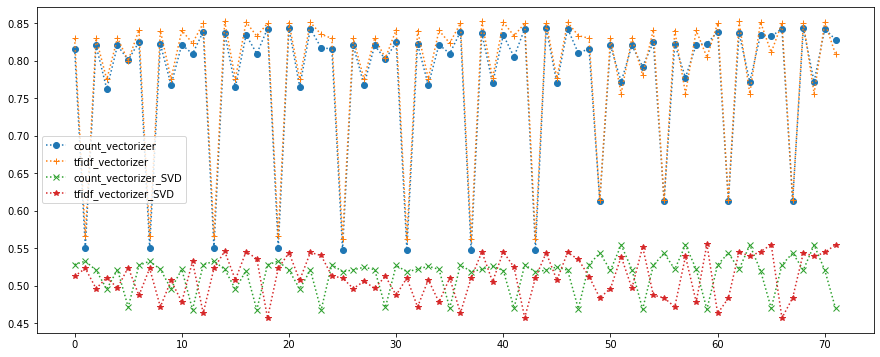

In [43]:
%matplotlib inline
plt.figure(figsize=(15, 6))
plt.plot(df_metrics.index, df_metrics['count_vectorizer'], ':o', label='count_vectorizer')
plt.plot(df_metrics.index, df_metrics['tfidf_vectorizer'], ':+', label='tfidf_vectorizer')
plt.plot(df_metrics.index, df_metrics['count_vectorizer_SVD'], ':x', label='count_vectorizer_SVD')
plt.plot(df_metrics.index, df_metrics['tfidf_vectorizer_SVD'], ':*', label='tfidf_vectorizer_SVD')
plt.legend()
plt.show()

In [ ]:
больше признаков лучше результат при n-gramm=2 анализ по словам